# HW 4:

Juan Vila

## Question 1:

In [49]:
import numpy as np
import warnings
import matplotlib . pyplot as plt
warnings.simplefilter('ignore')
from sklearn . metrics import mean_squared_error
def data_generator ( n_samples ):
    x = np . random . uniform ( -10 , 10 , n_samples )
    y = np . cos (0.5 + np . exp ( - x )) + 1/(1 + np . exp ( - x ))
    noise = np . random . normal (0 , 0.01 , n_samples )
    y += noise
    return x , y
complete_X , complete_Y = data_generator (5000)
train_X , train_Y = complete_X [:100] , complete_Y [:100]
large_X , large_Y = complete_X [100:] , complete_Y [100:]
loss_func = mean_squared_error

### Part A

In [29]:
def beta_est(Y,x,cons=True):
    if cons:
        X = np.column_stack((x,np.ones([len(x),1])))
    else:
        X=x.copy()
    return np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),\
                  np.dot(np.transpose(X),Y))

def polynomial(x,d):
    rv = x.copy()
    if d>1:
        for i in range(2,d+1):
           rv =  np.column_stack((rv,x ** i))
    else:
        return x
    
    return rv

def proyection(Y,x, cons=True):
    if cons:
        X = np.column_stack((x,np.ones([len(x),1])))
    else:
        X=x.copy()
    y_hat = np.dot(X,beta_est(Y,x,cons))
    return y_hat



def error_poly(n_poly, X, y):
    errors = []
    for i in range(n_poly):  
        if i == 0:
            x2 = np.ones([len(X),1])
        else:   
            x2 = np.column_stack((np.ones([len(X),1]),polynomial(X,i)))
        coef = ((np.linalg.inv(np.transpose(x2)@x2)@np.transpose(x2)@y))
        errors.append(((x2@coef- y)**2).sum()/len(x2))
    return errors



def error_poly_cross_val(n_poly, X, y,Xl,yl):
    errors = []
    for i in range(n_poly):  
        if i == 0:
            x2 = np.ones([len(X),1])
            x2l = np.ones([len(Xl),1])
        else:   
            x2 = np.column_stack((np.ones([len(X),1]),polynomial(X,i)))
            x2l = np.column_stack((np.ones([len(Xl),1]),polynomial(Xl,i)))
        coef = ((np.linalg.inv(np.transpose(x2)@x2)@np.transpose(x2)@y))
        errors.append(((x2l@coef- yl)**2).sum()/len(x2l))
    return errors



In [3]:
'''
error_sq = []
for i in range(31):  
    if i == 0:
        x2 = np.ones([len(train_X),1])
    else:   
        x2 = np.column_stack((np.ones([len(train_X),1]),polynomial(train_X,i)))
    coef = ((np.linalg.inv(np.transpose(x2)@x2)@np.transpose(x2)@train_Y))
    error_sq.append(((x2@coef- train_Y)**2).sum()/len(x2))
'''
error_sq =error_poly(31,train_X, train_Y)


In [4]:
print('Mininmal Square Error:',(np.array(error_sq)).min())

Mininmal Square Error: 0.20932454287986946


In [5]:
print('Degree of polynomail that minimize risk',np.argmin(np.array(error_sq)))

Degree of polynomail that minimize risk 20


### Part B

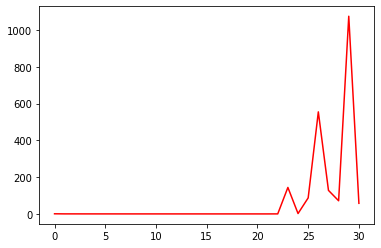

In [6]:
import matplotlib.pyplot as plt
plt.plot(error_sq,color='r', label='error square')

### Part C

### $R^*$

Since we know the true process behind $y=f(x) + \epsilon$, and we know that $\epsilon$ ~ $N(0,0.01)$ we can argue that $R^*$ on average is the variance of $\epsilon$ . Since the MSE of would be: 
$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y-f(x))^2$$
$$MSE = \frac{1}{n}\sum_{i=1}^{n}(f(x) + \epsilon-f(x))^2$$
$$MSE = \frac{1}{n}\sum_{i=1}^{n}(\epsilon)^2$$
$$MSE = \sigma_{\epsilon}$$

We present the calculation below

In [35]:
y_non_noice_train =train_Y-np . random . normal (0 , 0.01 , 100 )
y_non_noice_large =large_Y-np . random . normal (0 , 0.01 , 4900 )
r_star= ((large_Y-y_non_noice_large)**2).mean()
print("R^* is",r_star)

R^* is 0.00010019491220344034


In [39]:
error_sq_cv =error_poly_cross_val(25,train_X, train_Y,large_X,large_Y)

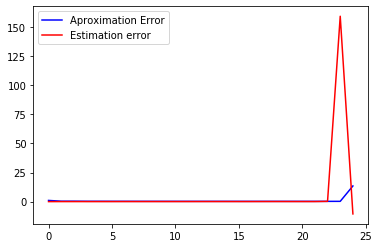

In [59]:
'''
error_sq_large = []
for i in range(31):  
    if i == 0:
        x2 = np.ones([len(large_X),1])
    else:   
        x2 = np.column_stack((np.ones([len(large_X),1]),polynomial(large_X,i)))
    coef = ((np.linalg.inv(np.transpose(x2)@x2)@np.transpose(x2)@large_Y))
    error_sq_large.append(((x2@coef- large_Y)**2).sum()/len(x2))
    
'''

error_sq_large =error_poly(25,large_X, large_Y)

aprox_error = np.array(error_sq_large) - r_star
estimation_error = np.array(error_sq_cv) - np.array(error_sq_large)



plt.plot(aprox_error ,color='b', label='Aproximation Error')
plt.plot(estimation_error,color='r', label='Estimation error')
plt.legend()

## Question 2

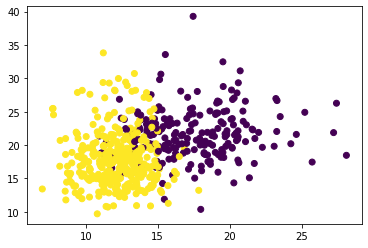

In [44]:
from sklearn.model_selection import train_test_split
from sklearn . datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
import matplotlib . pyplot as plt
X , y = load_breast_cancer ( return_X_y = True )
X = X [: , :2]
plt . clf ()
plt . scatter ( X [: , 0] , X [: , 1] , c = y )
plt . show ()

### Part A

In [46]:
import sklearn
from sklearn import tree
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.25, random_state=42)
clf_a = tree.DecisionTreeClassifier()
clf_a = clf_a.fit(X_train, y_train)
y_pred_train = clf_a.predict(X_train)
y_pred_test = clf_a.predict(X_test)
print('In sample accuracy: ',sklearn.metrics.accuracy_score(y_train, y_pred_train))
print('In out of sample accuracy: ',sklearn.metrics.accuracy_score(y_test, y_pred_test))

In sample accuracy:  1.0
In out of sample accuracy:  0.8461538461538461


### Part B

Text(0, 0.5, 'MSE')

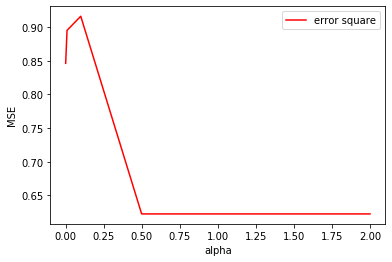

In [47]:
alpha_list = [1/1000,1/100,1/10,1/2,3/4,1,2]
acc_test = []
acc_train = []
for ccp in alpha_list:
    clf = tree.DecisionTreeClassifier(ccp_alpha=ccp)
    clf = clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    acc_train.append(sklearn.metrics.accuracy_score(y_train, y_pred_train))
    acc_test.append(sklearn.metrics.accuracy_score(y_test, y_pred_test))
plt.plot(alpha_list,acc_test,color='r', label='error square')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('MSE')

### Part C

In [13]:
# Python
def plot_regions ( tree ):
    plot_colors = ['yellow', 'purple']
    plot_step = 0.02
    breast_cancer = load_breast_cancer ()
    X = breast_cancer.data
    y = breast_cancer.target
    plt.clf ()
    idx = np . arange ( X . shape [0])
    np . random . shuffle ( idx )
    X = X [ idx ]
    y = y [ idx ]
    x_min , x_max = X [: , 0]. min () - 1 , X [: , 0]. max () + 1
    y_min , y_max = X [: , 1]. min () - 1 , X [: , 1]. max () + 1
    xx , yy = np.meshgrid ( np . arange ( x_min , x_max , plot_step ), np . arange ( y_min , y_max , plot_step ))
    Z = tree.predict ( np.c_ [ xx.ravel() , yy.ravel()])
    Z = Z.reshape (xx.shape )
    cs = plt.contourf ( xx , yy , Z , cmap = plt . cm . Paired )
    plt.xlabel( breast_cancer . feature_names [0])
    plt.ylabel ( breast_cancer . feature_names [1])
    plt.axis ('tight')
    for i , color in zip( range (2) , plot_colors ):
        idx = np . where ( y == i )
        plt . scatter ( X [ idx , 0] , X [ idx , 1] , c = color , label = breast_cancer.target_names [ i ] ,cmap = plt.cm.Paired )

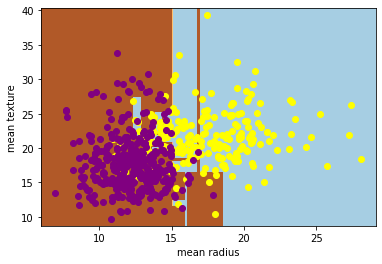

In [14]:
plot_regions ( clf_a)

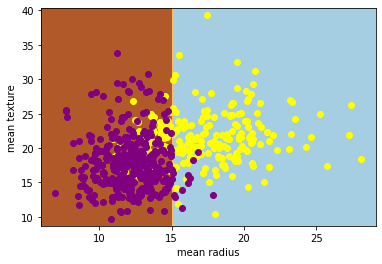

In [15]:

min_alpha = alpha_list[np.argmax(acc_test)]

clf_min_b = tree.DecisionTreeClassifier(ccp_alpha=min_alpha)
clf_min_b = clf_min_b.fit(X_train, y_train)
plot_regions(clf_min_b )

## Question 3

### Part A

In [51]:
import numpy as np
np . random . seed (0)
N_fold = 10
N_test = 500
N_train = 1000
N = N_test + N_train
# Specify feature dimensions of X and Y
X_dim = 20
Y_dim = 10
X = np.random.randn (N , X_dim )
# Only have 10 non - zero entries in beta ,
nnz = 10
beta = np . zeros (( X_dim * Y_dim ))
nnz_idx = np.random.choice( X_dim * Y_dim , nnz , replace = False )
beta [ nnz_idx ] = np.random.randn ( nnz ) * 2
beta = beta . reshape ( X_dim , Y_dim )
xb = X @ beta
Y = xb + np . random . rand (N , Y_dim )
# Split training and testing set
X_test = X [: N_test ]
Y_test = Y [: N_test ]
X_train = X [ N_test :]
Y_train = Y [ N_test :]

In [52]:
def lasso_prediction_insample(X_train,X_test,Y_train,Y_test,alpha_c):
    clf = sklearn.linear_model.Lasso(alpha=alpha_c,max_iter=20000)
    clf = clf.fit(X_train,Y_train)
    y_hat = clf.predict(X_train)
    from sklearn.metrics import mean_squared_error
    ee = mean_squared_error(Y_train, y_hat)
    return ee

Text(0, 0.5, 'MSE')

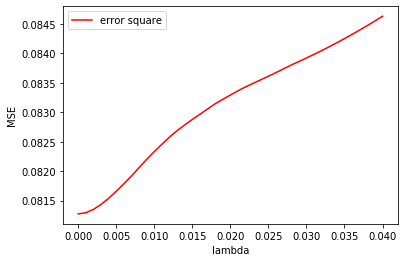

In [53]:
rv = []
lambda_list = []
for alpha in range(0,41):
    ee_i = lasso_prediction_insample(X_train,X_test,Y_train,Y_test,alpha/1000)
    rv.append(ee_i)
    lambda_list.append(alpha/1000)
plt.plot(lambda_list,rv,color='r', label='error square')
plt.legend()
plt.xlabel('lambda')
plt.ylabel('MSE')

### Part B

In [54]:

import random
import numpy as np
#data=np.stack(Y_test, X_test,axis=0)
# Split a dataset into k folds
def cross_validation_split(dataset_X, dataset_Y, folds=3):
    dataset_split_X = list()
    dataset_split_Y = list()
    dataset_copy_X = list(dataset_X)
    dataset_copy_Y = list(dataset_Y)
    fold_size = int(len(dataset_X) / folds)
    for i in range(folds):
        fold_X = list()
        fold_Y = list()
        while len(fold_X) < fold_size:
            index = random.randrange(len(dataset_copy_X))
            fold_X.append(dataset_copy_X.pop(index))
            fold_Y.append(dataset_copy_Y.pop(index))
        dataset_split_X.append(fold_X)
        dataset_split_Y.append(fold_Y)
    return dataset_split_X, dataset_split_Y 

In [55]:
X_cv,Y_cv = cross_validation_split(X_train,Y_train,10)

In [56]:
(np.concatenate(X_cv, axis=0 )).shape

(1000, 20)

In [57]:
def lasso_prediction_outsample(X_train,X_test,Y_train,Y_test,alpha_c):
    clf = sklearn.linear_model.Lasso(alpha=alpha_c,max_iter=20000)
    clf = clf.fit(X_train,Y_train)
    y_hat = clf.predict(X_test)
    from sklearn.metrics import mean_squared_error
    ee = mean_squared_error(Y_test, y_hat)
    return ee



def k_fold(fold, X, Y, alpha_c):
    X_cv,Y_cv = cross_validation_split(X,Y,fold)
    mean_ee = []
    for i in range(10):
        Y_test_iter = Y_cv[i]
        X_test_iter = X_cv[i]
        Y_train_iter = np.concatenate(Y_cv[:i]+Y_cv[i+1:], axis = 0)
        X_train_iter = np.concatenate(X_cv[:i]+X_cv[i+1:], axis= 0)
        ee = lasso_prediction_outsample(X_train_iter,X_test_iter,Y_train_iter,Y_test_iter,alpha_c)
        mean_ee.append(ee)
    return np.array(mean_ee).mean()

#k_fold(10, X_train, Y_train,.2)


rv_fold = []
lambda_list_fold = []
for alpha in range(0,41):
    ee_i = k_fold(10, X_train, Y_train,alpha/1000)
    rv_fold.append(ee_i)
    lambda_list_fold.append(alpha/1000)

    

Text(0, 0.5, 'MSE')

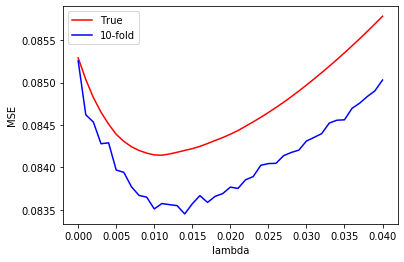

In [58]:
rv_cv = []
lambda_cv_list = []
for alpha in range(0,41):
    ee_i = lasso_prediction_outsample(X_train,X_test,Y_train,Y_test,alpha/1000)
    rv_cv.append(ee_i)
    lambda_cv_list.append(alpha/1000)

plt.plot(lambda_cv_list,rv_cv,color='r', label='True')
plt.plot(lambda_cv_list,rv_fold,color='b', label='10-fold')
plt.legend()
plt.xlabel('lambda')
plt.ylabel('MSE')